In [9]:
!pip install bokeh
!pip install seaborn
!pip install scipy

In [1]:
import pyodbc as pyodbc
from decouple import config
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

DB_SERVER = '172.25.0.124'
DB_PORT = '60388'
DB_NAME = 'TOAT'
DB_USER = 'uniconuser01'
DB_PASSWORD = '87654321'

connStr = ('DRIVER={ODBC Driver 17 for SQL Server};Server=%s,%s;port=%s;Database=%s;uid=%s;pwd=%s') \
         % (DB_SERVER, DB_PORT, DB_PORT, DB_NAME, DB_USER, DB_PASSWORD)
print(connStr)
cnxn = pyodbc.connect(connStr)
cursor = cnxn.cursor()
print(cnxn, cursor)
print(cursor.execute("SELECT @@SPID").fetchone())

DRIVER={ODBC Driver 17 for SQL Server};Server=172.25.0.124,60388;port=60388;Database=TOAT;uid=uniconuser01;pwd=87654321
<pyodbc.Connection object at 0x7f14425c1370> <pyodbc.Cursor object at 0x7f1441eb1300>
(56, )


In [2]:
import textwrap
sql = textwrap.dedent("""
-- total clear
SELECT [id]
      ,[path_main]
      ,[log_date]
      --,[path_full]
      --,[query_str]
      ,[ip_add]
      ,[tip]
      ,[ver]
      ,[fun]
      --,[line]
      --,[reg_date]
      --,[log_date_short]
      --,[len_query_str]
      ,[num_gui_export] as guias
      ,[num_obr_search] as obras
      ,[idMarca]
      ,[idCli]
      ,[idUsu]
      ,[desde]
      ,[hasta]
      --,[coObr]
      ,[tiRes]
      ,[seGui]
      ,[nuGui]
      ,[nuPed]
      ,[ti_exp]
      ,[diff_rango_dias] as dias
      ,[diff_rango_mes] as meses
      ,[id_search]
      ,[seg_a]
      ,[seg_b]
      ,[seg_c]
      ,[seg_d]
      ,[seg]
FROM [TOAT].[dbo].[tmp_proxy_certificado_log] (nolock)
WHERE 1=1
    AND seg IS NOT NULL
	AND coObr IS NOT NULL
	AND fun = 'EXPORT'
	AND log_date_short >= '2018-01-01'
	and diff_rango_dias > 0
    and tip = 'MOVIL'
ORDER BY log_date_short, IP_ADD, LOG_DATE
""")

In [3]:
dfQ = pd.read_sql(sql, cnxn)
print(dfQ.head())

      id path_main            log_date          ip_add    tip ver     fun  \
0  49454   /inicio 2018-01-02 08:38:41  132.184.130.55  MOVIL   1  EXPORT   
1  49455   /inicio 2018-01-02 08:39:22  132.184.130.55  MOVIL   1  EXPORT   
2  49456   /inicio 2018-01-02 08:43:12  132.184.130.55  MOVIL   1  EXPORT   
3  49452   /inicio 2018-01-02 08:31:53  190.113.208.87  MOVIL   1  EXPORT   
4  49453   /inicio 2018-01-02 08:32:13  190.113.208.87  MOVIL   1  EXPORT   

   guias  obras  idMarca ...   nuPed  ti_exp dias meses id_search  seg_a  \
0      1      1      1.0 ...    None     CER   62   2.0     50171  False   
1      1      1      1.0 ...    None     CER   62   2.0     50171  False   
2      1      1      1.0 ...    None     CER   62   2.0     50171  False   
3      1      1      1.0 ...    None     CER   60   1.0     50169  False   
4      1      1      1.0 ...    None     CER   60   1.0     50170  False   

  seg_b  seg_c  seg_d  seg  
0  True  False  False    B  
1  True  False  False 

In [4]:
print(dfQ.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 27 columns):
id           1084 non-null int64
path_main    1084 non-null object
log_date     1084 non-null datetime64[ns]
ip_add       1084 non-null object
tip          1084 non-null object
ver          1084 non-null object
fun          1084 non-null object
guias        1084 non-null int64
obras        1084 non-null int64
idMarca      1083 non-null float64
idCli        1084 non-null int64
idUsu        694 non-null float64
desde        1084 non-null object
hasta        1084 non-null object
tiRes        34 non-null object
seGui        2 non-null object
nuGui        3 non-null object
nuPed        6 non-null object
ti_exp       1084 non-null object
dias         1084 non-null int64
meses        1084 non-null float64
id_search    1084 non-null int64
seg_a        1084 non-null bool
seg_b        1084 non-null bool
seg_c        1084 non-null bool
seg_d        1084 non-null bool
seg          1084 non-nu

In [5]:
print(dfQ.describe())

                 id        guias        obras      idMarca         idCli  \
count   1084.000000  1084.000000  1084.000000  1083.000000   1084.000000   
mean   17543.684502     6.046125     5.278598     1.282548    932.663284   
std    23497.893600    26.558038    12.204546     0.454532   1053.111652   
min        1.000000     1.000000     1.000000     0.000000     14.000000   
25%      275.750000     1.000000     1.000000     1.000000    191.000000   
50%      548.500000     1.000000     1.000000     1.000000    657.000000   
75%    49558.250000     2.000000     3.000000     2.000000   1496.500000   
max    49836.000000   479.000000   145.000000     2.000000  11376.000000   

              idUsu         dias        meses     id_search  
count    694.000000  1084.000000  1084.000000   1084.000000  
mean    4021.458213    74.073801     2.357934  19232.033210  
std     5126.899839   126.412719     4.087808  23087.309549  
min        0.000000     1.000000     0.000000    726.000000  
25%  

In [6]:
print(dfQ['guias'].describe())


count    1084.000000
mean        6.046125
std        26.558038
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       479.000000
Name: guias, dtype: float64


In [7]:
dfQ['guias'].mode(), dfQ["guias"].quantile(0.90)

(0    1
 dtype: int64, 9.0)

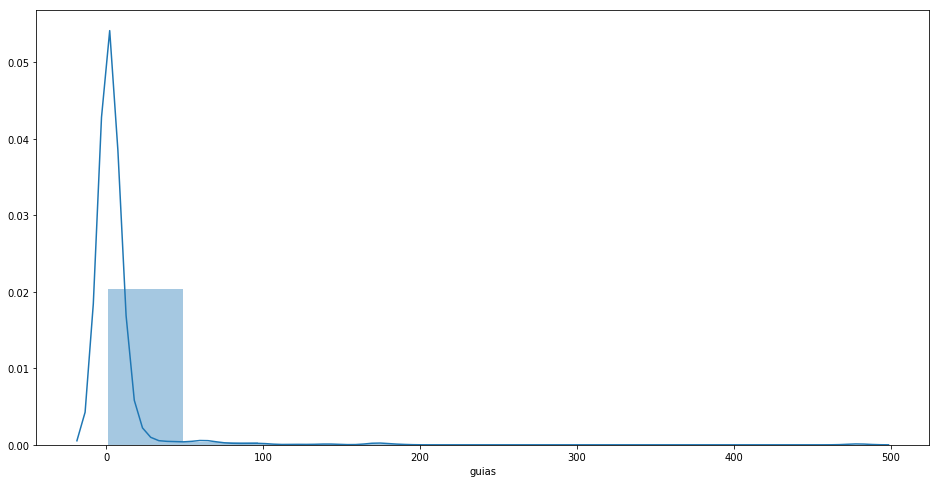

In [10]:
f, ax = plt.subplots(figsize=(16,8))
vis1 = sns.distplot(dfQ["guias"],bins=10)
#vis2 = sns.distplot(dfQ["guias"],bins=10, ax=ax[0][1])
#vis3 = sns.distplot(dfQ["obras"],bins=10, ax=ax[1][0])
#vis4 = sns.distplot(dfQ["meses"],bins=10, ax=ax[1][1])